In [1]:
# fix python path if working locally
from utils import fix_pythonpath_if_working_locally
fix_pythonpath_if_working_locally()

from darts.models import TCNModel, RNNModel
from darts.utils import timeseries_generation as tg
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [2]:
ts_length = 400
split_ratio = 0.6
sine_1_ts = tg.sine_timeseries(length=ts_length)
sine_2_ts = tg.sine_timeseries(length=ts_length, value_frequency=0.05)
sine_3_ts = tg.sine_timeseries(length=ts_length, value_frequency=0.003, value_amplitude=5)
linear_ts = tg.linear_timeseries(length=ts_length, start_value=3, end_value=8)


covariates = sine_3_ts.stack(sine_2_ts).stack(linear_ts)
covariates_past, covariates_future = covariates.split_after(split_ratio)

target = sine_1_ts + sine_2_ts + linear_ts + sine_3_ts
target_past, target_future = target.split_after(split_ratio)
model = TCNModel(input_chunk_length=50, output_chunk_length=10, n_epochs=100, random_state=0)

model.fit(series=target_past)
long_pred_no_cov = model.predict(n=160, series=[target_past, target_past[:60]])

model = TCNModel(input_chunk_length=50, output_chunk_length=10, n_epochs=100, random_state=0)
model.fit(series=target_past, covariates=covariates_past)
long_pred_with_cov = model.predict(n=160, series=[target_past, target_past[:60], target_past[:80]], covariates=[covariates]*3, batch_size=2)

[2021-06-22 11:42:11,491] INFO | darts.models.torch_forecasting_model | Train dataset contains 181 samples.
[2021-06-22 11:42:11,491] INFO | darts.models.torch_forecasting_model | Train dataset contains 181 samples.
[2021-06-22 11:42:11,497] INFO | darts.models.tcn_model | Number of layers chosen: 4
[2021-06-22 11:42:11,497] INFO | darts.models.tcn_model | Number of layers chosen: 4
[2021-06-22 11:42:15,337] INFO | darts.models.torch_forecasting_model | Train dataset contains 181 samples.
[2021-06-22 11:42:15,337] INFO | darts.models.torch_forecasting_model | Train dataset contains 181 samples.
[2021-06-22 11:42:15,341] INFO | darts.models.tcn_model | Number of layers chosen: 4
[2021-06-22 11:42:15,341] INFO | darts.models.tcn_model | Number of layers chosen: 4


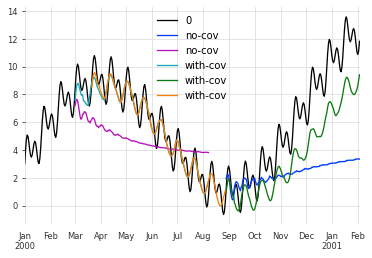

In [3]:
target.plot()
long_pred_no_cov[0].plot(label='no-cov')
long_pred_no_cov[1].plot(label='no-cov')
long_pred_with_cov[1].plot(label='with-cov')
long_pred_with_cov[0].plot(label='with-cov')
long_pred_with_cov[2].plot(label='with-cov')
plt.legend()

In [4]:
model.batch_size

32